In [1]:
# Load calculated measurements from previous runs:
import numpy as np
import pickle
from build_database import flux_obj
from scipy import interpolate
from matplotlib import pyplot as plt
from GLD_file_tools import GLD_file_tools
from satellite import Satellite
import datetime
import ephem
from coordinate_structure import coordinate_structure
from coordinate_structure import transform_coords
from longitude_scaling import longitude_scaling
from ionoAbsorp import ionoAbsorp
import os
from mpl_toolkits.basemap import Basemap
from precip_model import precip_model
import itertools
from measurement_model import measurement_model
import random

%matplotlib inline

In [86]:
cur_dir = '/Users/austin/FUSE/shared/users/asousa/WIPP/fluxMDP/outputs/'

datafiles = []

d = dict()
# d['off'] = dict()
# d['low'] = dict()
# d['mid'] = dict()
# d['high']= dict()
# d['continuous'] = dict()

# for f in os.listdir(cur_dir):   
#     if f.startswith('data_i'):
#         datafiles.append(f)

for root, dirs, files in os.walk(cur_dir):
    
    for f in files:
        if f.startswith('data_i'):
            datafiles.append(f)
            with open(os.path.join(root,f),'rb') as p:
                data = pickle.load(p)
                for row in data:
                    #print row
#                     d[row[0][3]][row[0][2]] = row[1]
                    timestamp = row[0][2]
                    meas_type = row[0][3]
                    data = row[1]
                    if not timestamp in d:
                        d[timestamp] = dict()
                    if meas_type in d[timestamp]:
                        if not d[timestamp][meas_type] == data:
                            print "Mismatch!" + timestamp + meas_type
#                    d[row[0][2]][row[0][3]] = row[1]
                    d[timestamp][meas_type] = data
                print "times: %g" % len(d.keys())
                    
#            print "off: %g, on: %g" %(len(d['off'].keys()), len(d['continuous'].keys()))

times: 480
times: 960
times: 1440
times: 1920
times: 2400
times: 2880
times: 3360
times: 3840
times: 4320
times: 4800
times: 5280
times: 5760
times: 6240
times: 6720
times: 7200
times: 7680
times: 8160
times: 8640
times: 9120
times: 9600
times: 10080
times: 10560
times: 11040
times: 11520
times: 12000
times: 12480
times: 12960
times: 13440
times: 13920
times: 14400
times: 14880
times: 15360
times: 15840
times: 16320
times: 16800
times: 17280
times: 17760
times: 18240
times: 18720
times: 19200
times: 19680
times: 20160
times: 20640
times: 21120
times: 21600
times: 22080
times: 22560
times: 22740
times: 23220
times: 23700
times: 24180
times: 24660
times: 25140
times: 25620
times: 26100
times: 26580
times: 27060
times: 27540
times: 28020
times: 28500
times: 28980
times: 29460
times: 29940
times: 30420
times: 30900
times: 31380
times: 31860
times: 32340
times: 32820
times: 33300
times: 33780
times: 34260
times: 34740
times: 35220
times: 35700
times: 36180
times: 36660
times: 37140
times: 3

In [88]:
outfile = '/Users/austin/FUSE/shared/users/asousa/WIPP/fluxMDP/outputs/'
with open(os.path.join(outfile, 'all_measurements.pkl'),'wb') as file:
    pickle.dump(d,file)

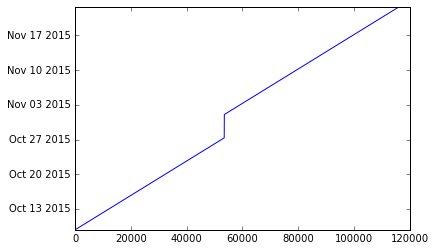

In [87]:
# plt.plot(sorted(d['off'].keys()))
# plt.plot(sorted(d['continuous'].keys()))
# plt.plot(sorted(d['low'].keys()))
# plt.plot(sorted(d['mid'].keys()))
# plt.plot(sorted(d['high'].keys()))


plt.plot(sorted(d.keys()))